# IBM HR Analytics Employee Attrition.

### This projects covers key areas such as:
----
<ul>
<li><a href="#Extraction">Extraction</a></li>
<li><a href="#Analysis">Analysis</a></li>
<li><a href="#Visualization">Visualization</a></li>
</ul>



### Task 
----

> Using the [attr_data.db](https://drive.google.com/file/d/13cdx4kWB6-WZe1VTjPqnFRgYzzGZHt2x/view?usp=sharing), extract all the data from the only table in the database using SQL. Once the data is extracted, import the data into Pandas and continue with the analysis.
> #### The following questions should be answered:
> #### <li><a href="#What do you think are the 3 factors behind employee attrition?">What do you think are the 3 factors behind employee attrition?</a></li>
>#### <li><a href="#What is the relationship between Education and Monthly Income?">What is the relationship between Education and Monthly Income?</a></li>
>#### <li><a href="#What is the effect of age on attrition?">What is the effect of age on attrition?</a></li>
>#### <li><a href="#Is Income the main factor towards employee attrition?">Is Income the main factor towards employee attrition??</a></li>
>#### <li><a href="#How does work-life balance impact the overall attrition rate?">How does work-life balance impact the overall attrition rate?</a></li>

In [1]:
!pip install Pillow

### Importing packages

In [2]:
# creating the sql engine and connecting
import sqlalchemy
from sqlalchemy import create_engine

In [3]:
import sys
print(sys.executable)

C:\Users\HP\anaconda3\python.exe


In [4]:
# Manipulation and data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# creating the sql engine and connecting
import sqlalchemy
from sqlalchemy import create_engine

<a id='Extraction'></a>
## Extraction

##### Note Sqlalchemy library has been imported which is used in creating the sql engine

### Engine connection examples
Click [Link](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#engine-connection-examples) to view documentation

In [5]:
engine = create_engine("sqlite:///attr_data.db")

In [6]:
df = pd.read_sql_table('attrition_records',engine)
df

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


<a id='Analysis'></a>
## Analysis

### Exploratory Data Analysis

In [7]:
# Short overview of what the data looks like
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# checking the overall data info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [9]:
# Listing the columns i'm working with
df.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# inspecting the columns
df.shape

(1470, 36)

In [11]:
df.isnull().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [12]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Judging by the descriptive statistics of the dataframe:
* we can tell the total employee count is 1470, 
* minimum age of an employee is 18 and highest is 60, the mean age is 37
* the mean daily rate income is ```$802```, minimum is ```$102``` and maximum is ```$1499```

<AxesSubplot:xlabel='Education', ylabel='Density'>

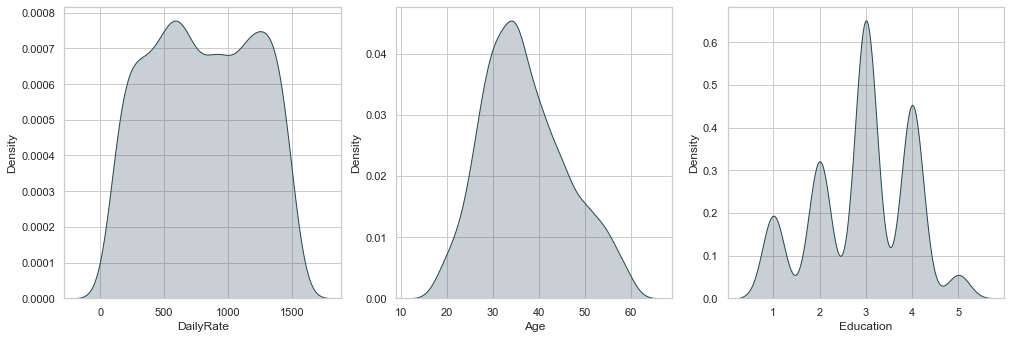

In [13]:
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Create the first plot
sns.kdeplot(df['DailyRate'], shade=True, color='#264653', ax=ax[0])

# Create the second plot
sns.kdeplot(df['Age'], shade=True, color='#264653', ax=ax[1])

# Create the third plot
sns.kdeplot(df['Education'], shade=True, color='#264653', ax=ax[2])


```The age, DailyRate and Educational distribution of employees```

In [14]:
#Mapping the attrition 1 - yes and 0 - no in the new column called "Attrition_ind"

df["Attrition_ind"] = np.where(df["Attrition"] == "Yes",1,0)

In [15]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,80,0,8,0,1,6,4,0,5,1
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,80,1,10,3,3,10,7,1,7,0
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,80,0,7,3,3,0,0,0,0,1
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,80,0,8,3,3,8,7,3,0,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80,1,6,3,3,2,2,2,2,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

<a id='What do you think are the 3 factors behind employee attrition?'></a>
## What do you think are the 3 factors behind employee attrition?

#### 1. Monthly Income

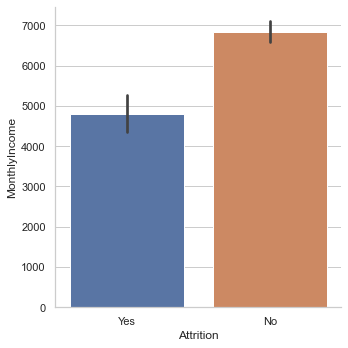

In [17]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

> ```Employees in the 'No' class tend to have higher average incomes, which is expected as those earning well are less likely to want to leave the organization. On the other hand, employees who are earning less are more likely to consider changing companies.```

#### 2.  Age

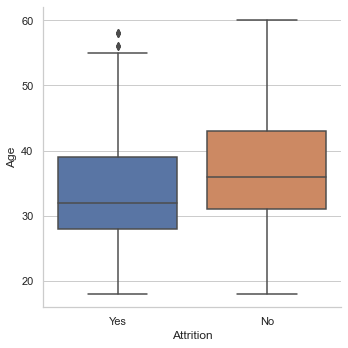

In [18]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

> ```The above boxplot shows that it is worth noting that the median and maximum ages of people with 'No' attrition are higher than those in the 'Yes' category. This suggests that people with higher ages are less likely to leave the organization, which makes sense as they may be more settled in their roles.```

#### 3. Total Working years

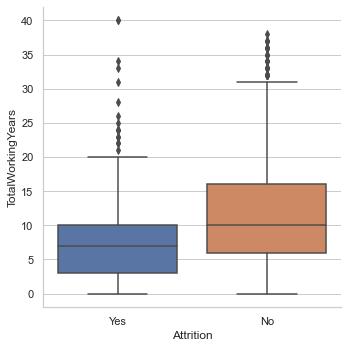

In [19]:
sns.factorplot(data=df,y='TotalWorkingYears',x='Attrition',size=5,aspect=1,kind='box')

> ```Younger employees who have less experience may be more likely to leave their current company in pursuit of higher pay, even if they have received a salary increase. This could be because they are looking for opportunities to advance their careers and increase their earning potential.```

<a id='What is the relationship between Education and Monthly Income?'></a>
## What is the relationship between Education and Monthly Income?

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

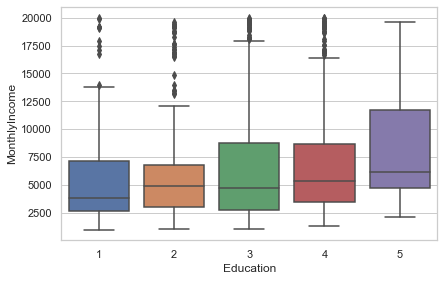

In [20]:
sns.boxplot(x='Education', y='MonthlyIncome', data=df)

```Here shows the higher the year spent on education the higher the pay```

<a id='#What is the effect of age on attrition?'></a>
## What is the effect of age on attrition?

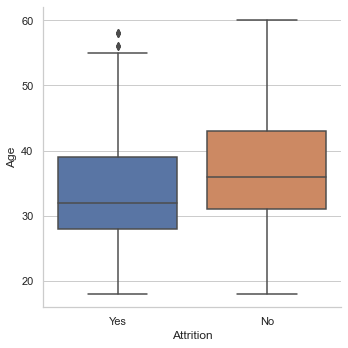

In [21]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

**```Most of the employees who left the company were younger than 40 years old, as shown by the Age Comparison boxplot. On the other hand, the majority of employees who did not leave the company were between the ages of 32 and 40 years old.```**

## Is Income the main factor towards employee attrition??

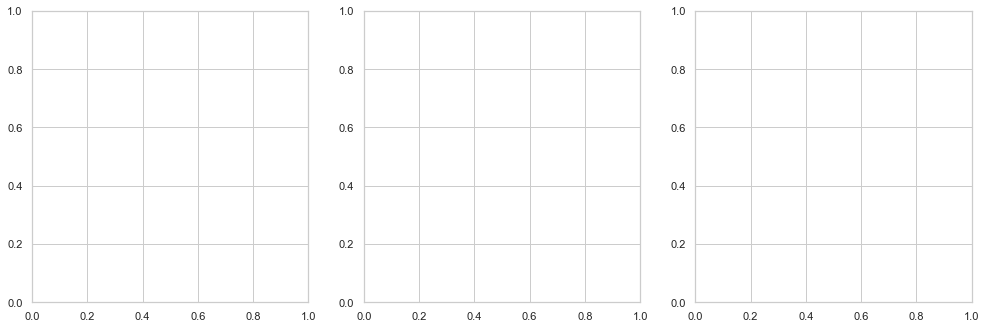

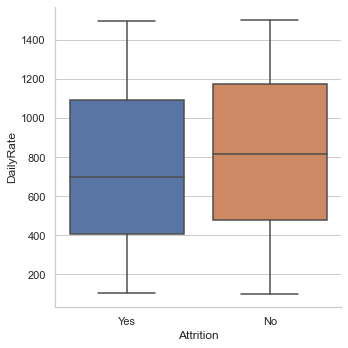

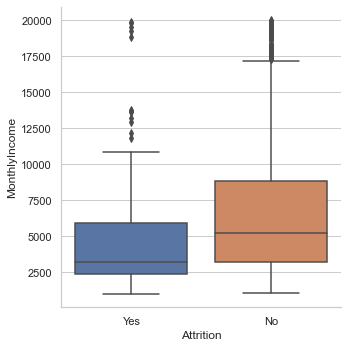

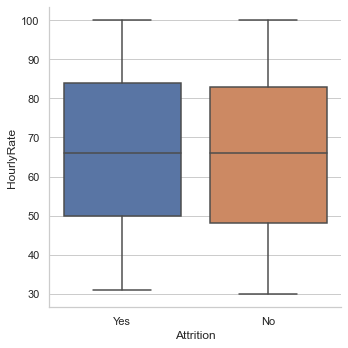

In [22]:
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Create the first plot
DRate = sns.factorplot(data=df, y='DailyRate', x='Attrition', size=5, aspect=1, kind='box', ax=ax[0])

# Create the second plot
MIncome = sns.factorplot(data=df, y='MonthlyIncome', x='Attrition', size=5, aspect=1, kind='box', ax=ax[1])

# Create the third plot
Hrate = sns.factorplot(data=df, y='HourlyRate', x='Attrition', size=5, aspect=1, kind='box', ax=ax[2])

plt.tight_layout()
plt.show()

**```From the above analysis it is safe to say Employees with lower daily pay rates are more likely to leave the company than those with higher pay rates. This trend is also seen with monthly income. As for Hourly rates there is no significant difference.```**

<a id='How does work-life balance impact the overall attrition rate'></a>
## How does work-life balance impact the overall attrition rate

### Worklife balance 

In [23]:
# Create a cross-tabulation of the Attrition and WorkLifeBalance variables
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


<AxesSubplot:xlabel='WorkLifeBalance'>

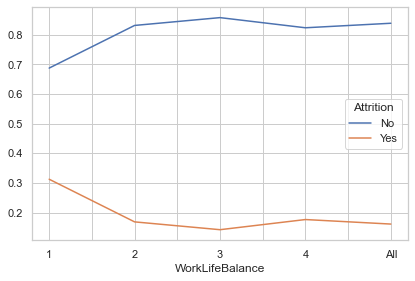

In [24]:
# Create a cross-tabulation of the Attrition and WorkLifeBalance variables
ct1 = pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

# Plot the cross-tabulation
ct1.plot()

> **```The data suggests that employees who have a good work-life balance are more likely to stay with the company, while those who do not feel they have a good balance are more likely to consider leaving. This makes sense, as people who feel overwhelmed or overworked may be more likely to look for opportunities elsewhere.```**

<a id='Visualization'></a>
## Visualization

**Distribution Plot of some parameters**

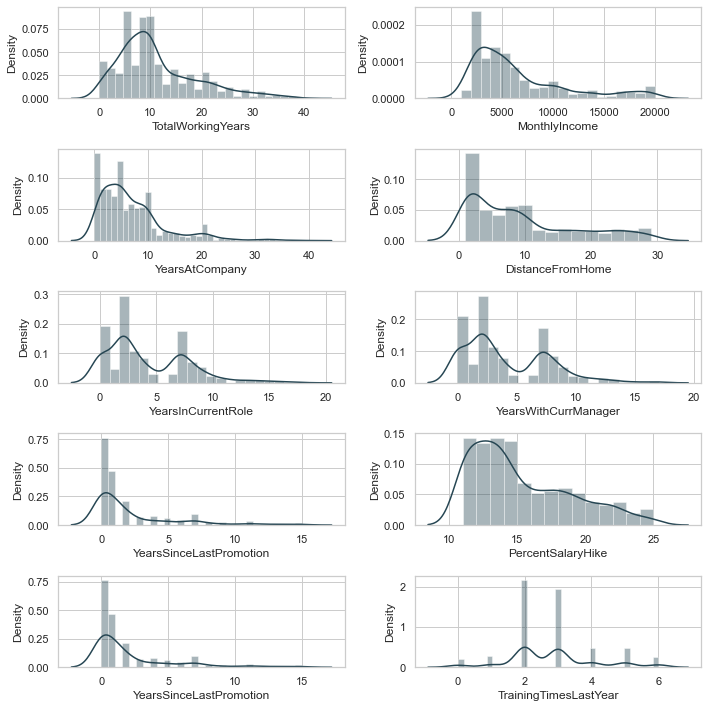

In [25]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Set the color for all plots
color = '#264653'

# Create a figure with five rows and two columns
fig, ax = plt.subplots(5, 2, figsize=(10, 10))

# Create the first plot
sns.distplot(df['TotalWorkingYears'], color=color, ax=ax[0, 0])

# Create the second plot
sns.distplot(df['MonthlyIncome'], color=color, ax=ax[0, 1])

# Create the third plot
sns.distplot(df['YearsAtCompany'], color=color, ax=ax[1, 0])

# Create the fourth plot
sns.distplot(df['DistanceFromHome'], color=color, ax=ax[1, 1])

# Create the fifth plot
sns.distplot(df['YearsInCurrentRole'], color=color, ax=ax[2, 0])

# Create the sixth plot
sns.distplot(df['YearsWithCurrManager'], color=color, ax=ax[2, 1])

# Create the seventh plot
sns.distplot(df['YearsSinceLastPromotion'], color=color, ax=ax[3, 0])

# Create the eighth plot
sns.distplot(df['PercentSalaryHike'], color=color, ax = ax[3,1])

# Create the nineth plot
sns.distplot(df['YearsSinceLastPromotion'], color=color, ax = ax[4,0])

# Create the tenth plot
sns.distplot(df['TrainingTimesLastYear'], color=color, ax = ax[4,1])

plt.tight_layout()
plt.show()

> **```The above multiple plot figure visualizes the distribution of multiple variables at the same time, and can be helpful for comparing the distributions of different variables or for identifying patterns and trends in the employee data.```**